In [69]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, fetch_openml
from sklearn.ensemble import AdaBoostClassifier

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [6]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],voting= 'hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [7]:
for clf in (log_clf, rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.904


In [8]:
svm_h_clf = SVC(probability=True)

In [9]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc',svm_h_clf)],voting= 'soft'
)
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [10]:
for clf in (log_clf, rnd_clf, svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.912


In [11]:
bag_clf = BaggingClassifier(
     DecisionTreeClassifier(), n_estimators= 500,
    max_samples= 100, bootstrap= True, n_jobs=-1
)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.904


In [12]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

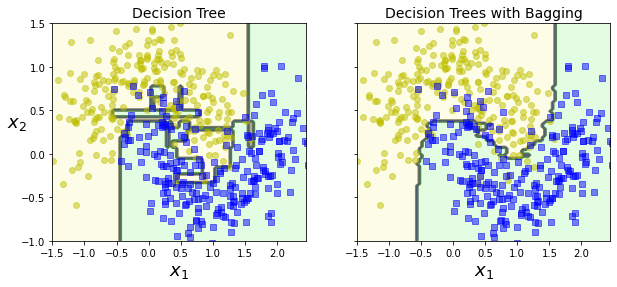

In [14]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [15]:
bag_clf = BaggingClassifier(
      DecisionTreeClassifier(), n_estimators=500,
      bootstrap=True, n_jobs= -1,oob_score=False
)
bag_clf.fit(X_train,y_train)
#print('oob score:',bag_clf.oob_score_)
y_pred = bag_clf.predict(X_test)
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.912


In [16]:
bag_clf_oob = BaggingClassifier(
      DecisionTreeClassifier(), n_estimators=500,
      bootstrap=True, n_jobs= -1,oob_score=True
)
bag_clf_oob.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [21]:
bag_clf_oob.oob_score_

0.904

In [22]:
y_pred = bag_clf_oob.predict(X_test)
accuracy_score(y_test,y_pred)

0.888

In [23]:
bag_clf_oob.oob_decision_function_

array([[0.34375   , 0.65625   ],
       [0.31137725, 0.68862275],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08648649, 0.91351351],
       [0.32474227, 0.67525773],
       [0.01190476, 0.98809524],
       [0.99404762, 0.00595238],
       [0.98947368, 0.01052632],
       [0.78125   , 0.21875   ],
       [0.00606061, 0.99393939],
       [0.78680203, 0.21319797],
       [0.90575916, 0.09424084],
       [0.96296296, 0.03703704],
       [0.04761905, 0.95238095],
       [0.        , 1.        ],
       [0.97916667, 0.02083333],
       [0.93617021, 0.06382979],
       [1.        , 0.        ],
       [0.01612903, 0.98387097],
       [0.40116279, 0.59883721],
       [0.93258427, 0.06741573],
       [1.        , 0.        ],
       [0.95336788, 0.04663212],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65816327, 0.34183673],
       [0.

In [25]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [27]:
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.92

In [33]:
bag_clf = BaggingClassifier(
      DecisionTreeClassifier(splitter= 'random', max_leaf_nodes=16),
      n_estimators= 500, max_samples=1.0, bootstrap= True, n_jobs= -1
)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

In [35]:
iris = load_iris()

In [36]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'],iris['target'])
for name ,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
      print(name,score)

sepal length (cm) 0.08933437853711249
sepal width (cm) 0.02495405762995015
petal length (cm) 0.4396793551978464
petal width (cm) 0.44603220863509085


In [67]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap= plt.cm.hot,interpolation='nearest')
    plt.axis('off')

In [52]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [53]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

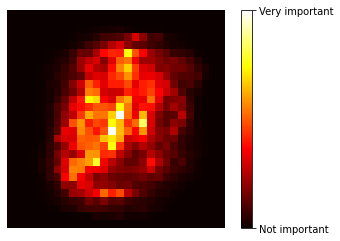

In [68]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()


In [70]:
ada_clf = AdaBoostClassifier(predict(X_test)
          DecisionTreeClassifier(max_depth= 1), n_estimators= 200,
          algorithm= 'SAMME.R', learning_rate= 0.5
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [73]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

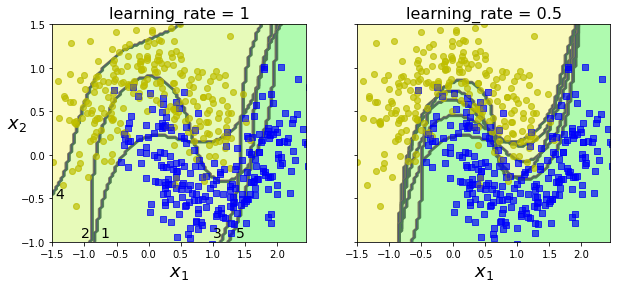

In [77]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()